In [2]:
#📦 Nova proposta: Previsão de Demanda e Análise de Estoque
#🏭 Cenário simulado:
#Uma rede de mercados quer entender como a demanda por produtos varia ao longo dos meses, prever futuras reposições e evitar excesso ou falta de estoque.
#🔍 Objetivos da empresa:
#Identificar produtos com comportamento de consumo instável
#Verificar sazonalidade de demanda por mês ou estação
#Relacionar vendas com volume de estoque
#Avaliar impacto de promoções nos níveis de venda
#Sugerir estratégias baseadas em dados para otimizar estoque

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("D:/Projetos/projetos-em-ia-e-analise/dados/dados_estoque_simulado.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   data            3650 non-null   object 
 1   produto_id      3650 non-null   object 
 2   categoria       3650 non-null   object 
 3   vendas_qtd      3650 non-null   int64  
 4   estoque_qtd     3650 non-null   int64  
 5   preco_unitario  3650 non-null   float64
 6   promocao        3650 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 199.7+ KB


In [4]:
df.head()

,data,produto_id,categoria,vendas_qtd,estoque_qtd,preco_unitario,promocao
0,2023-01-01,PROD_1,Alimento,23,152,11.55,1
1,2023-01-01,PROD_2,Alimento,10,153,13.09,0
2,2023-01-01,PROD_3,Higiene,7,70,18.72,0
3,2023-01-01,PROD_4,Alimento,10,64,16.78,0
4,2023-01-01,PROD_5,Bebida,7,113,13.31,0


In [5]:
df.isnull().sum()

data              0
produto_id        0
categoria         0
vendas_qtd        0
estoque_qtd       0
preco_unitario    0
promocao          0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,vendas_qtd,estoque_qtd,preco_unitario,promocao
count,3650.000000,3650.000000,3650.000000,3650.000000
mean,11.926027,124.039726,14.165205,0.189315
std,5.263410,43.433160,6.192294,0.391812
min,2.000000,50.000000,3.510000,0.000000
25%,8.000000,86.000000,8.730000,0.000000
50%,11.000000,123.000000,14.185000,0.000000
75%,14.000000,162.000000,19.410000,0.000000
max,35.000000,199.000000,24.990000,1.000000


In [8]:
df.groupby("produto_id")[["vendas_qtd"]].agg(["std"]) #Desvio padrão da primeira questão

,vendas_qtd
,std
produto_id,
PROD_1,4.994499
PROD_10,4.873962
PROD_2,5.240845
PROD_3,5.809592
PROD_4,5.248051
PROD_5,5.771093
PROD_6,5.063696
PROD_7,5.233783


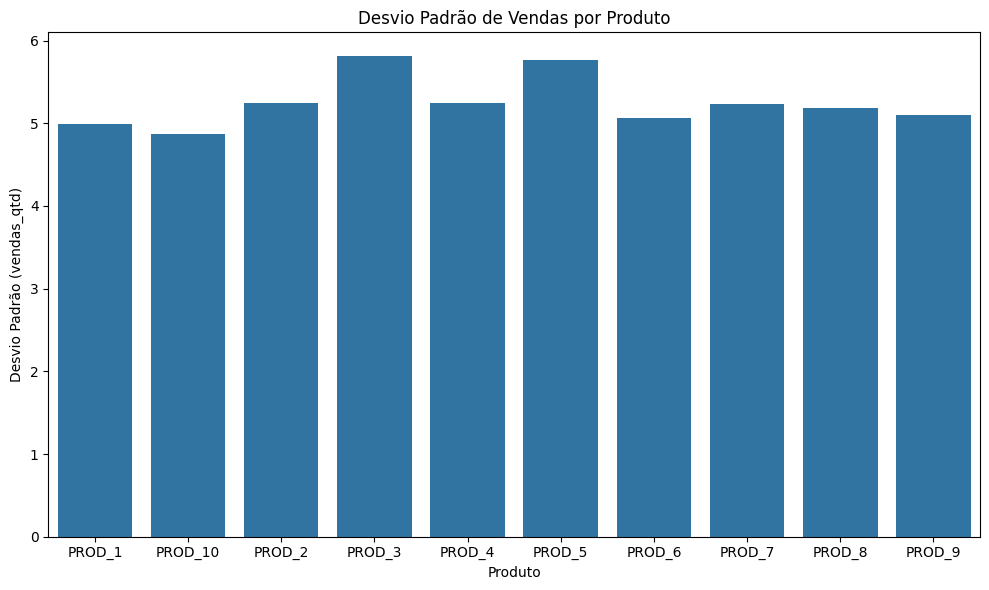

In [9]:
# Agrupar e calcular desvio padrão
std_por_produto = df.groupby("produto_id")["vendas_qtd"].std().reset_index()

# Renomear coluna para facilitar o gráfico
std_por_produto.columns = ["produto_id", "std_vendas"]

plt.figure(figsize=(10,6))
sns.barplot(x="produto_id", y="std_vendas", data=std_por_produto)
plt.title("Desvio Padrão de Vendas por Produto")
plt.ylabel("Desvio Padrão (vendas_qtd)")
plt.xlabel("Produto")
plt.tight_layout()
plt.show()

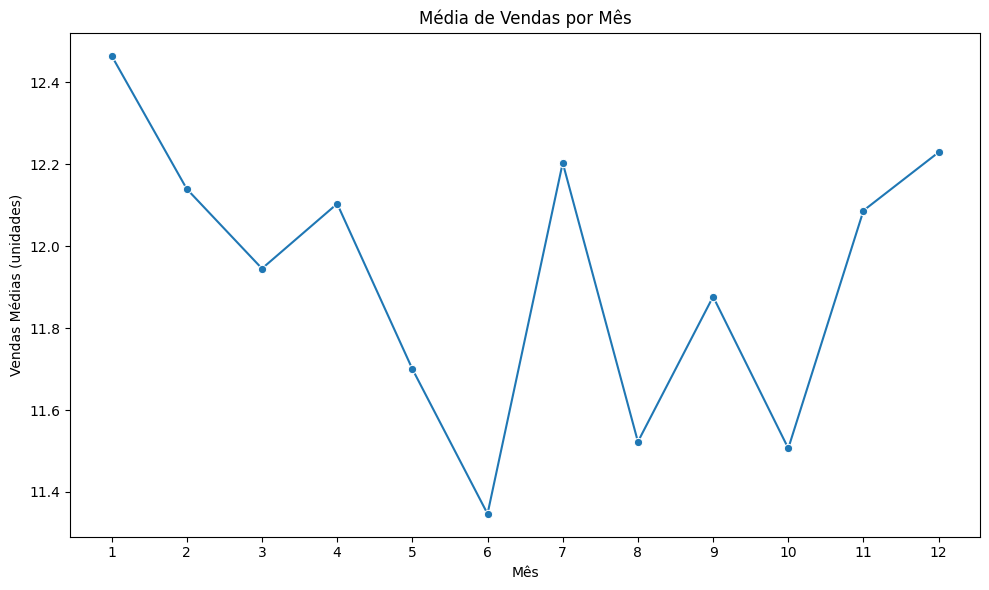

In [16]:
df["data"] = pd.to_datetime(df["data"]) #converter coluna object em data
df["mes"] = df["data"].dt.month #extrair as datas para uma nova coluna
vendas_mensais = df.groupby("mes")["vendas_qtd"].mean().reset_index() #agrupar as colunas na variável resetando o index

plt.figure(figsize=(10,6))
sns.lineplot(data=vendas_mensais, x="mes", y="vendas_qtd", marker="o")
plt.title("Média de Vendas por Mês")
plt.xlabel("Mês")
plt.ylabel("Vendas Médias (unidades)")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

In [17]:
df["promocao"].value_counts()

promocao
0    2959
1     691
Name: count, dtype: int64

In [15]:
#Calcular a média de horas_uso quando houve evento (evento == 1):

df.groupby("promocao")[["vendas_qtd"]].agg(["mean"])

,vendas_qtd
,mean
promocao,
0,9.987834
1,20.225760


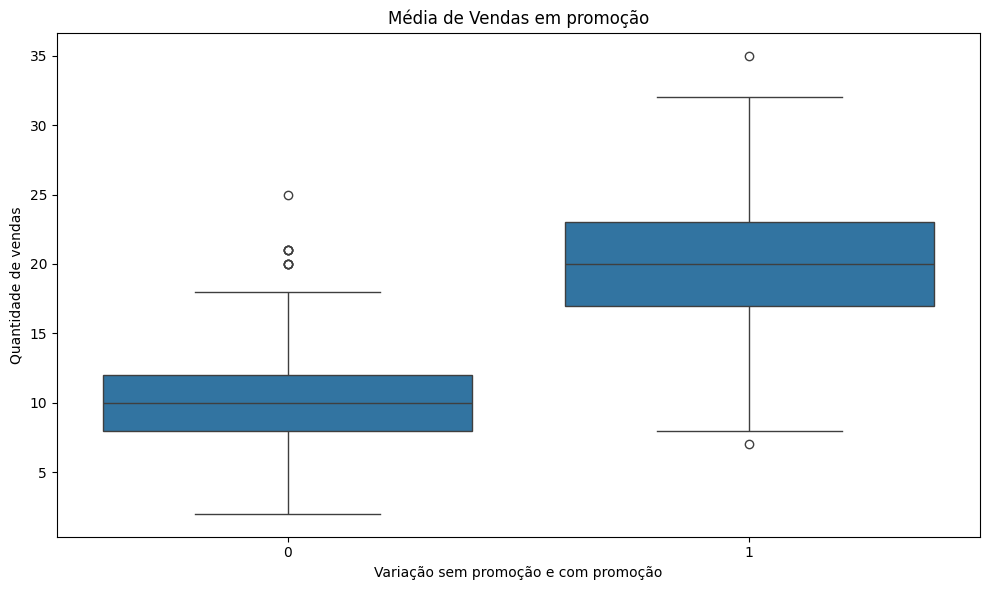

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot (x="promocao", y="vendas_qtd", data=df)
plt.title("Média de Vendas em promoção")
plt.xlabel("Variação sem promoção e com promoção")
plt.ylabel("Quantidade de vendas")
plt.tight_layout()
plt.show()

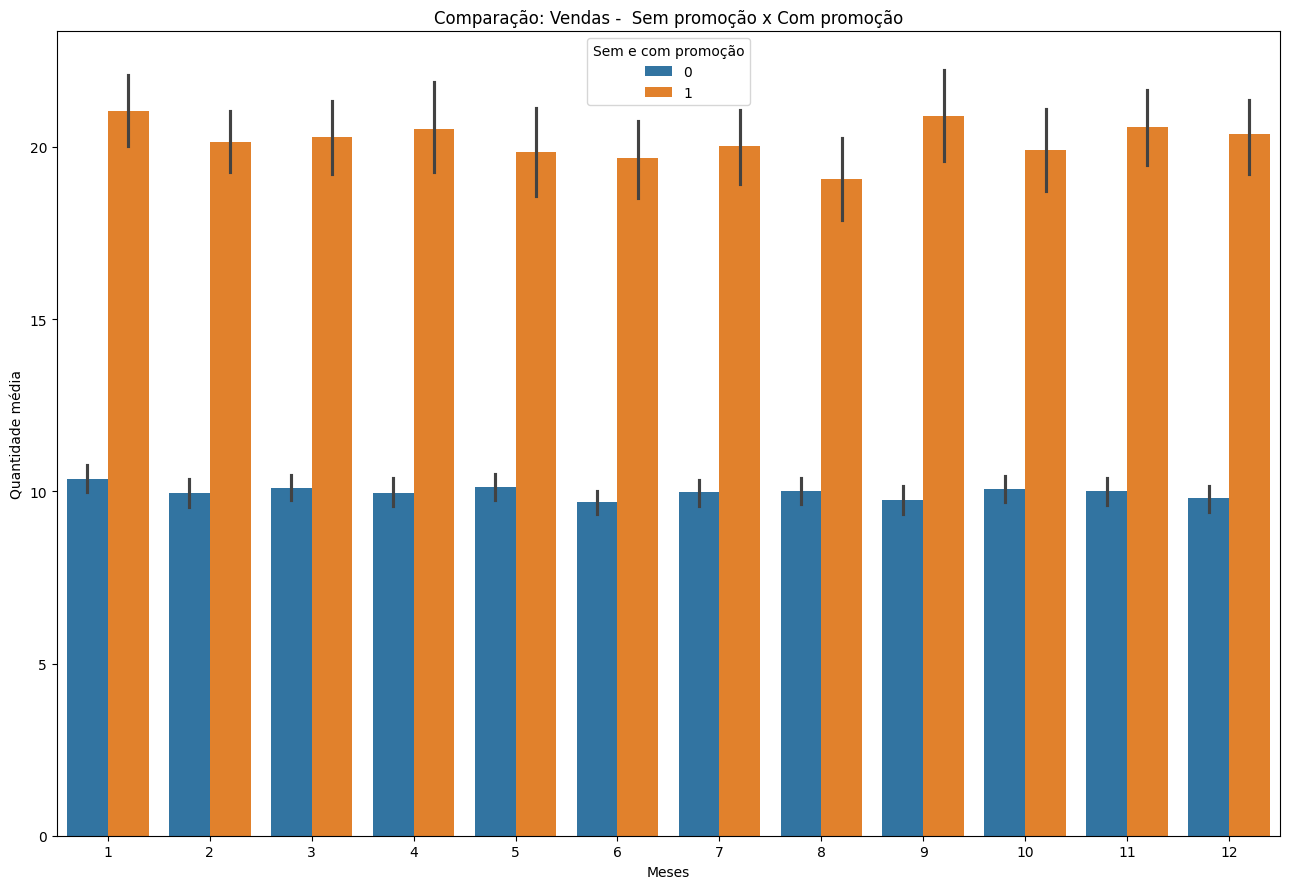

In [34]:
plt.figure(figsize=(13,9))
sns.barplot(data=df, x="mes", y="vendas_qtd", hue=df["promocao"])
plt.title("Comparação: Vendas -  Sem promoção x Com promoção")
plt.xlabel("Meses")
plt.ylabel("Quantidade média")
plt.legend(title="Sem e com promoção")
plt.tight_layout()